## Исследовательский анализ данных изменений пользовательских предпочтений и популярности событий для Yandex Afisha за осень 2024 года.
----------------------------------------------------------------------------------------------------------------------

- Автор: Григорьев Константин 
- Дата: 27.04.2025

### Цели и задачи проекта
----------------------------

Вы создали дашборд, которым уже активно пользуются ваши коллеги. С его помощью можно было увидеть, что с наступлением осени увеличилось количество заказов, однако у средней стоимости был тренд к снижению. 

С чем это могло быть связано?

Коллеги из продуктовой команды просят провести исследовательский анализ данных в Python, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.


В этом задании вам нужно будет провести исследовательский анализ данных и представить результаты, оформленные в Jupyter Notebook. Старший аналитик уже готов вам предоставить более детальные задачи.

### Описание данных
----------------

В расположении данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. Для проекта, данные были выгружены из базы данных в готовом виде в датасет: `final_tickets_orders_df.csv` и `final_tickets_events_df`.

Первый датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. 

Поля датасета соответствуют таблице purchases, с которой вы работали в предыдущих заданиях:
- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.

Второй датасет `final_tickets_events_df` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Обратите внимание, что из данных исключили фильмы, ведь, как было видно на дашборде, событий такого типа не так много. 

Датасет содержит такие поля:
- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.

Анализ данных в предыдущей части проекта показал, что выручка от заказов представлена в двух валютах — российских рублях и казахстанских тенге. Для удобства решения было бы корректно привести данные к одной валюте, например к российским рублям. Для этого в вашем распоряжении будет датасет `final_tickets_tenge_df.csv` с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. 

Датасет содержит такие поля:
- `nominal` — номинал (100 тенге).
- `data` — дата.
- `curs` — курс тенге к рублю.
- `cdx` — обозначение валюты (kzt).

### Описание проекта
----

В прошлых уроках вы узнали, что коллеги из продуктового отдела сервиса Яндекс Афиша заметили общее изменение в пользовательском спросе. Причины этого пока неясны. Сработал фактор сезонности, и пользователи поменяли предпочтения? Или изменилась аудитория? Стоит также разобраться, какие события стали привлекать больше зрителей, а какие организаторы и площадки выбились в лидеры. А также понять, отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера.

Проведите исследовательский анализ данных, чтобы дать ответы на вопросы коллег. В ходе проекта вы будете активно работать с категориями событий, рассчитывать среднюю выручку с заказа и продажи одного билета в рублях, а также изучать распределение значений по категориям и периодам времени.

### Содержимое проекта
--------------------------
- Шаг 1. Загрузка данных и знакомство с ними;
- Шаг 2. Предобработка данных и подготовка их к исследованию;
- Шаг 3. Исследовательский анализ данных;
- Шаг 4. Статистический анализ данных;
- Шаг 5. Общий вывод и рекомендации.

## Шаг 1. Загрузка данных и знакомство с ними

- Загрузите данные и получите первую информацию о них. Оцените объём данных, их корректность и соответствие описанию, а также предположите, какие шаги необходимо сделать на стадии предобработки данных. Основные моменты зафиксируйте в промежуточном выводе.

In [1]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#Читаем файлы
orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')

In [3]:
events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')

In [4]:
tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

Выведем первые строки и оценим данные визуально:

In [5]:
# Выведем информацию о заказах 
orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [6]:
# Выведем информацию о событиях
events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [7]:
# Выведем информацию о валютах
tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


Выведем информацию о датасетах о кол-ве столбцов, строк, пропусках и тд. 

In [8]:
# Выведем полную информацию о датасете о заказах
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Датасет о заказах содержит 14 столбцов и 290849 тысяч строк. Столбцы `created_dt_msk`, `created_ts_msk` - сейчас находятся в типе данных object, их необходимо привести к типу данных `datetime64[ds]`. 

Пропуски обнаружены только в столбце `days_since_prev`.

In [9]:
# Выведем полную информацию о датасете о событиях
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Датасет о событиях содержит 11 столбцов и 22427 тысяч строк. В данных нет пропусков и все типы данных соответсвуют тому, что нам нужно будет на следующих этапах.

In [10]:
# Выведем полную информацию о датасете о валюте
tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Датасет о событиях содержит 4 столбца и 357 строк. В данных нет пропусков и но столбец `data` необходимо привести к типу данных `datetime64[ds]`.

### Промежуточный вывод по Шагу 1.

- В датасете ordes_df cтолбцы `created_dt_msk`, `created_ts_msk` необходимо привести к типу данных `datetime64[ds]`;
- В датасете tenge_df столбец `data` необходимо привести к типу данных `datetime64[ds]`.

## Шаг 2. Предобработка данных и подготовка их к исследованию
- Проведите предобработку данных.

Рекомендация: вначале можно объединить данные в один датафрейм, а затем провести общую предобработку.
После предобработки проверьте, сколько данных вы отобрали, если выполняли фильтрацию, а также дайте промежуточный вывод с основными действиями и описанием новых столбцов.

In [11]:
df_order_events = pd.merge(orders_df,events_df, on='event_id', how='left')

In [12]:
df = pd.merge(df_order_events, tenge_df, left_on='created_dt_msk', right_on='data', how='left')

In [13]:
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


In [14]:
order_shape = orders_df.shape[0]

event_shape = events_df.shape[0]

tenge_shape = tenge_df.shape[0]

order_events_shape = df_order_events.shape[0]

df_shape = df.shape[0]

print(f'До объединения датасеты имели размер: \n - orders_df {order_shape};\n - events_df {event_shape};\n - tenge_df {tenge_shape}.')
print(f'После объединения полученые датасеты имеют размер:\n - df_order_events {order_events_shape}.\nА после присоединения информации о валютах:\n - df {df_shape}.')

До объединения датасеты имели размер: 
 - orders_df 290849;
 - events_df 22427;
 - tenge_df 357.
После объединения полученые датасеты имеют размер:
 - df_order_events 290849.
А после присоединения информации о валютах:
 - df 290849.


### Проверка данные на пропуски
- Проверьте, что выгрузка данных из SQL была успешной. Кроме столбца days_since_prev, данные не должны содержать пропусков.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

Данные выгружены корректно, пропуские есть только в столбце `days_since_prev`.

В получившемся датасете 290611 строк и 28 столбцов.

### Изучение значений в ключевых столбцах и обработка ошибок
- Для категориальных значений изучите, какие категории присутствуют в данных. 
- Проверьте, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. 
- Проведите нормализацию данных, если это необходимо.
- Для количественных значений посмотрите на распределение и наличие выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха. 
- Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, поэтому в первую очередь проверьте данные в этих столбцах. Если найдутся выбросы в выручке с заказа revenue, то отберите значения по 99-му процентилю. Не забудьте, что данные изначально были представлены в разных валютах, поэтому разделите анализ на рубли и тенге.

Категоральные значения содержат столбцы: `cinema_circuit`,`age_limit`,`currency_code`,`device_type_canonical`,`service_name`,`event_type_description`,`event_type_main`,`region_name`,`city_name`. Выведем уникальные значения из этих столбцов.

In [16]:
df['cinema_circuit'].unique()

array(['нет', 'Другое', 'Киномакс', 'КиноСити', 'Москино', 'ЦентрФильм'],
      dtype=object)

In [17]:
df['age_limit'].unique()

array([16,  0, 18, 12,  6])

In [18]:
df['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

In [19]:
df['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

In [20]:
df['service_name'].unique()

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

In [21]:
df['event_type_description'].unique()

array(['спектакль', 'событие', 'цирковое шоу', 'выставка', 'шоу',
       'концерт', 'спорт', 'мюзикл', 'фестиваль', nan, 'ёлка', 'балет',
       'спортивное мероприятие', 'опера', 'музыкальный спектакль',
       'кукольный спектакль', 'оперетта', 'снегурочка', 'рок-мюзикл',
       'экскурсия', 'подарок'], dtype=object)

In [22]:
df['event_type_main'].unique()

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт', nan,
       'ёлки'], dtype=object)

In [23]:
df['region_name'].unique()

array(['Каменевский регион', 'Североярская область', 'Озернинский край',
       'Лугоградская область', 'Поленовский край', 'Широковская область',
       'Медовская область', 'Златопольский округ', 'Малиновоярский округ',
       'Яблоневская область', 'Ветренский регион', 'Боровлянский край',
       'Крутоводская область', 'Ягодиновская область',
       'Серебряноярский округ', nan, 'Лесодальний край',
       'Верхоречная область', 'Горицветская область',
       'Речиновская область', 'Травиницкий округ', 'Сосновская область',
       'Серебринская область', 'Травяная область', 'Каменноярский край',
       'Солнечноземская область', 'Светополянский округ',
       'Заречная область', 'Ручейковский край', 'Глиногорская область',
       'Тепляковская область', 'Каменноозёрный край',
       'Солнечнореченская область', 'Зоринский регион',
       'Берёзовская область', 'Лесостепной край', 'Малиновая область',
       'Синегорский регион', 'Луговая область', 'Шанырский регион',
       'Каменоп

In [24]:
df['city_name'].unique()

array(['Глиногорск', 'Озёрск', 'Родниковецк', 'Кристалевск',
       'Дальнозолотск', 'Радужнополье', 'Радужсвет', 'Кумсай',
       'Верховино', 'Светополье', 'Кокжар', 'Каменский', 'Лесоярич',
       'Никольянов', 'Речинцево', 'Лесозолотск', nan, 'Дальнозерск',
       'Серебрянка', 'Островецк', 'Родниковец', 'Дальнесветск',
       'Луговаярово', 'Ягодиновка', 'Дальнополин', 'Солчелуг', 'Озёрчане',
       'Серебровино', 'Лесоярово', 'Глинополье', 'Глиноград',
       'Дальнесветин', 'Северополье', 'Теплоозеро', 'Горнодолинск',
       'Ордакент', 'Озёрово', 'Луговинск', 'Лугоград', 'Златопольск',
       'Крутовинск', 'Сарыжар', 'Сосновечин', 'Тихоярск', 'Яблонецк',
       'Жаркентай', 'Широковка', 'Синеводов', 'Синеводск', 'Тихосветск',
       'Радужанов', 'Глиногорь', 'Каменосветск', 'Родниковск',
       'Травогород', 'Глинянск', 'Радужинск', 'Поляногорье',
       'Дальнолесье', 'Ручейник', 'Ключеград', 'Ключеводск', 'Поленовино',
       'Речичанск', 'Ключевополье', 'Шаныртау', 'Дальнесо

In [25]:
df['event_name'].unique()

array(['f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad',
       '40efeb04-81b7-4135-b41f-708ff00cc64c',
       '01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca', ...,
       'cf71bf2b-8e5c-47e0-a0f3-c2d4910c4677',
       'f17a01b7-3cd3-4cd1-919c-3459bd074886',
       '0fd6df8e-49e5-4337-954d-5a4606b1b899'], dtype=object)

In [26]:
df['organizers'].unique()

array(['№3322', '№4850', '№1540', ..., '№1161', '№3497', '№1904'],
      dtype=object)

In [27]:
df['venue_name'].unique()

array(['Сценический центр "Деталь" Групп',
       'Музыкальная школа для детей "Аккаунт" Лтд',
       'Училище искусств "Нирвана" Инк', ...,
       'Университет искусств "Прогресс" Групп',
       'Творческая ярмарка "График" Инк', 'Школа музыки "Парадигма" Лтд'],
      dtype=object)

In [28]:
df['venue_address'].unique()

array(['алл. Машиностроителей, д. 19 стр. 6', 'алл. Шмидта, д. 9 стр. 4',
       'алл. Юбилейная, д. 5/6', ..., 'ш. Безымянное, д. 6',
       'алл. Тепличная, д. 4/1', 'пр. Сплавный, д. 236 к. 918'],
      dtype=object)

In [29]:
df['cdx'].unique()

array(['kzt'], dtype=object)

В столбце `cinema_circuit` встречается значение `Нет` и `Другое`, которое означает пропуски в данных.

В столбце `event_type_main` встречается значение `Nan` и `Другое`, что говорит об отсутствующих значениях в данных.

В столбце `region_name` встречается значение `Nan`, что говорит об отсутствующих значениях в данных.

Проведем нормализацю. По столбцам `region_name`,`city_name`,`event_name`, `venue_name`, `venue_address`. Чтоб исключить неявные дубликаты по этим столбцам. Для этого удалим пробелы в начале и в конце строк и приведем все наименования в нижний регистр.

In [30]:
df['region_name'].str.strip()

0           Каменевский регион
1           Каменевский регион
2           Каменевский регион
3         Североярская область
4             Озернинский край
                  ...         
290844      Каменевский регион
290845      Каменевский регион
290846      Каменевский регион
290847     Широковская область
290848    Малиновоярский округ
Name: region_name, Length: 290849, dtype: object

In [31]:
df['region_name'].str.lower()

0           каменевский регион
1           каменевский регион
2           каменевский регион
3         североярская область
4             озернинский край
                  ...         
290844      каменевский регион
290845      каменевский регион
290846      каменевский регион
290847     широковская область
290848    малиновоярский округ
Name: region_name, Length: 290849, dtype: object

In [32]:
df['city_name'].str.strip()

0          Глиногорск
1          Глиногорск
2          Глиногорск
3              Озёрск
4         Родниковецк
             ...     
290844     Глиногорск
290845     Глиногорск
290846     Глиногорск
290847     Ягодиновка
290848      Верховино
Name: city_name, Length: 290849, dtype: object

In [33]:
df['city_name'].str.lower()

0          глиногорск
1          глиногорск
2          глиногорск
3              озёрск
4         родниковецк
             ...     
290844     глиногорск
290845     глиногорск
290846     глиногорск
290847     ягодиновка
290848      верховино
Name: city_name, Length: 290849, dtype: object

In [34]:
df['event_name'].str.strip()

0         f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad
1         40efeb04-81b7-4135-b41f-708ff00cc64c
2         01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca
3         2f638715-8844-466c-b43f-378a627c419f
4         10d805d3-9809-4d8a-834e-225b7d03f95d
                          ...                 
290844    e3dcdb45-9eaa-4ce4-9b85-1562e548172e
290845    e3dcdb45-9eaa-4ce4-9b85-1562e548172e
290846    74883818-57a6-494a-b162-bb0260877cbf
290847    6f4c6a50-0106-407b-8f54-332c740b01da
290848    58574140-962c-49a3-af70-b773a05661a3
Name: event_name, Length: 290849, dtype: object

In [35]:
df['event_name'].str.lower()

0         f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad
1         40efeb04-81b7-4135-b41f-708ff00cc64c
2         01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca
3         2f638715-8844-466c-b43f-378a627c419f
4         10d805d3-9809-4d8a-834e-225b7d03f95d
                          ...                 
290844    e3dcdb45-9eaa-4ce4-9b85-1562e548172e
290845    e3dcdb45-9eaa-4ce4-9b85-1562e548172e
290846    74883818-57a6-494a-b162-bb0260877cbf
290847    6f4c6a50-0106-407b-8f54-332c740b01da
290848    58574140-962c-49a3-af70-b773a05661a3
Name: event_name, Length: 290849, dtype: object

In [36]:
df['venue_name'].str.strip()

0                      Сценический центр "Деталь" Групп
1             Музыкальная школа для детей "Аккаунт" Лтд
2                        Училище искусств "Нирвана" Инк
3         Театр альтернативного искусства "Ода" Лимитед
4                      Театр кукол "Огни" Инкорпорэйтед
                              ...                      
290844    Творческое объединение "Модуль" Инкорпорэйтед
290845    Творческое объединение "Модуль" Инкорпорэйтед
290846                    Клуб киноманов "Верность" Лтд
290847                    Гильдия художников "Флит" Инк
290848    Мастерская живого действия "Гардероб" Лимитед
Name: venue_name, Length: 290849, dtype: object

In [37]:
df['venue_name'].str.lower()

0                      сценический центр "деталь" групп
1             музыкальная школа для детей "аккаунт" лтд
2                        училище искусств "нирвана" инк
3         театр альтернативного искусства "ода" лимитед
4                      театр кукол "огни" инкорпорэйтед
                              ...                      
290844    творческое объединение "модуль" инкорпорэйтед
290845    творческое объединение "модуль" инкорпорэйтед
290846                    клуб киноманов "верность" лтд
290847                    гильдия художников "флит" инк
290848    мастерская живого действия "гардероб" лимитед
Name: venue_name, Length: 290849, dtype: object

In [38]:
df['venue_address'].str.strip()

0         алл. Машиностроителей, д. 19 стр. 6
1                    алл. Шмидта, д. 9 стр. 4
2                      алл. Юбилейная, д. 5/6
3                 алл. Есенина, д. 243 к. 3/8
4                ш. Набережное, д. 595 стр. 8
                         ...                 
290844              алл. Глинки, д. 9/8 к. 67
290845              алл. Глинки, д. 9/8 к. 67
290846               пр. Титова, д. 5 стр. 68
290847                     пр. Макарова, д. 4
290848       ш. 30 лет Победы, д. 38 стр. 664
Name: venue_address, Length: 290849, dtype: object

In [39]:
df['venue_address'].str.lower()

0         алл. машиностроителей, д. 19 стр. 6
1                    алл. шмидта, д. 9 стр. 4
2                      алл. юбилейная, д. 5/6
3                 алл. есенина, д. 243 к. 3/8
4                ш. набережное, д. 595 стр. 8
                         ...                 
290844              алл. глинки, д. 9/8 к. 67
290845              алл. глинки, д. 9/8 к. 67
290846               пр. титова, д. 5 стр. 68
290847                     пр. макарова, д. 4
290848       ш. 30 лет победы, д. 38 стр. 664
Name: venue_address, Length: 290849, dtype: object

Далее посмотрим на распределение и выросы в количественных значениях по столбцам: `tickets_count`,`total`,`days_since_prev`,`curs`,`revenue`.

Но перед этим разделим данные на курсы валют.

In [40]:
rub_df = df.loc[df['currency_code'] == 'rub']

In [41]:
kzt_df = df.loc[df['currency_code'] == 'kzt']

Далее выведем статистику по датафреймам:

In [42]:
rub_df.describe()

,order_id,event_id,age_limit,revenue,tickets_count,total,days_since_prev,city_id,venue_id,nominal,curs
count,2.857800e+05,285780.000000,285780.000000,285780.000000,285780.000000,285780.000000,264708.000000,285542.000000,285542.000000,285780.0,285780.000000
mean,4.328330e+06,436290.109154,10.189173,547.568333,2.754077,6325.455948,3.208898,906.738504,2714.319715,100.0,19.184938
std,2.499365e+06,148002.876039,6.542189,871.524559,1.171419,8617.602808,11.314047,3447.874005,1089.210727,0.0,0.621778
min,1.000000e+00,4436.000000,0.000000,-90.760000,1.000000,-358.850000,0.000000,2.000000,894.000000,100.0,17.848600
25%,2.160436e+06,355361.000000,6.000000,113.827500,2.000000,2113.790000,0.000000,39.000000,1706.000000,100.0,18.599100
50%,4.333224e+06,494565.000000,12.000000,346.100000,3.000000,4660.580000,0.000000,74.000000,2795.000000,100.0,19.325600
75%,6.492789e+06,546166.000000,16.000000,791.700000,4.000000,8778.290000,1.000000,213.000000,3699.000000,100.0,19.784300
max,8.653108e+06,592325.000000,18.000000,81174.540000,57.000000,811745.400000,148.000000,37172.000000,4677.000000,100.0,20.277300


In [43]:
kzt_df.describe()

,order_id,event_id,age_limit,revenue,tickets_count,total,days_since_prev,city_id,venue_id,nominal,curs
count,5.069000e+03,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,4201.000000,5069.000000,5069.000000,5069.0,5069.000000
mean,4.241196e+06,538940.386467,11.457487,4995.206767,2.762872,75236.969067,4.081171,2642.920694,2544.857171,100.0,19.412255
std,2.393295e+06,35666.533933,4.815624,4916.752776,1.115558,68039.218885,13.673274,8155.914777,932.041371,0.0,0.629375
min,2.758000e+04,42299.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000,922.000000,100.0,17.848600
25%,2.291262e+06,533803.000000,6.000000,518.100000,2.000000,9353.700000,0.000000,162.000000,1533.000000,100.0,18.914600
50%,4.083752e+06,536826.000000,12.000000,3698.830000,3.000000,61647.160000,0.000000,163.000000,2169.000000,100.0,19.738300
75%,6.256664e+06,559476.000000,16.000000,7397.660000,4.000000,114868.830000,1.000000,163.000000,3407.000000,100.0,19.892800
max,8.652702e+06,588573.000000,18.000000,26425.860000,6.000000,344606.500000,147.000000,29463.000000,4481.000000,100.0,20.277300


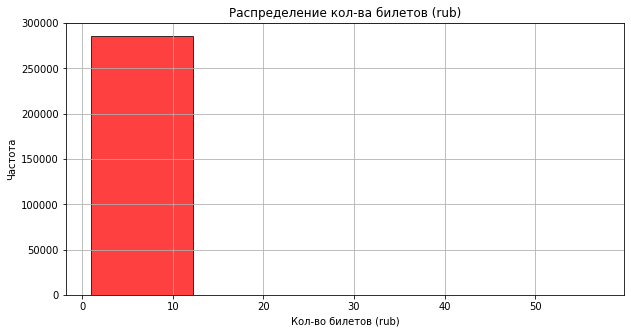

In [44]:
rub_df['tickets_count'].sort_values(ascending=False).plot(
                kind='hist',
                bins=5,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='red'
)

# Настраиваем оформление графика
plt.title('Распределение кол-ва билетов (rub)')
plt.xlabel('Кол-во билетов (rub)')
plt.ylabel('Частота')

# Выводим график
plt.show()

Частота билетов варьируется от 1 до 10.

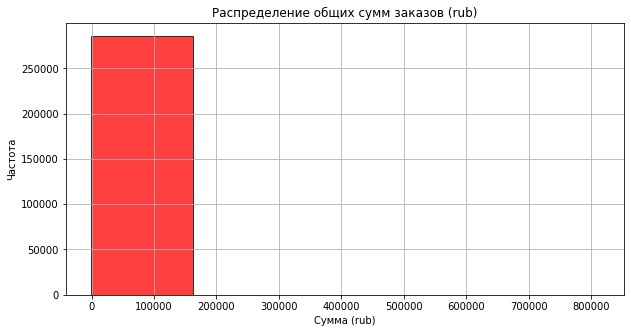

In [45]:
rub_df['total'].sort_values(ascending=False).plot(
                kind='hist',
                bins=5,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='red'
)

# Настраиваем оформление графика
plt.title('Распределение общих сумм заказов (rub)')
plt.xlabel('Сумма (rub)')
plt.ylabel('Частота')

# Выводим график
plt.show()

Общие суммы заказов распределяются от 0 до 150 тысяч.

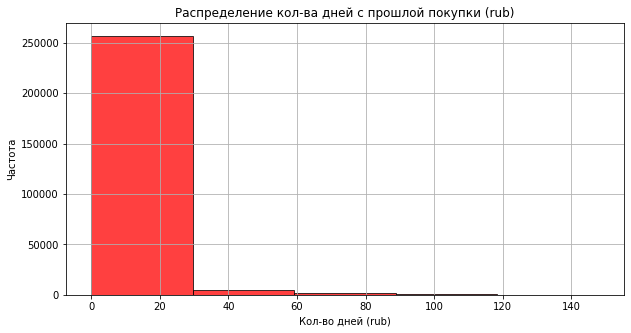

In [46]:
rub_df['days_since_prev'].sort_values(ascending=False).plot(
                kind='hist',
                bins=5,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='red'
)

# Настраиваем оформление графика
plt.title('Распределение кол-ва дней с прошлой покупки (rub)')
plt.xlabel('Кол-во дней (rub)')
plt.ylabel('Частота')

# Выводим график
plt.show()

Частота распределения кол-ва дней после покупки от 0 до 30. Диаграмма имеет правый хвост, что говорит о выбросах в данных.

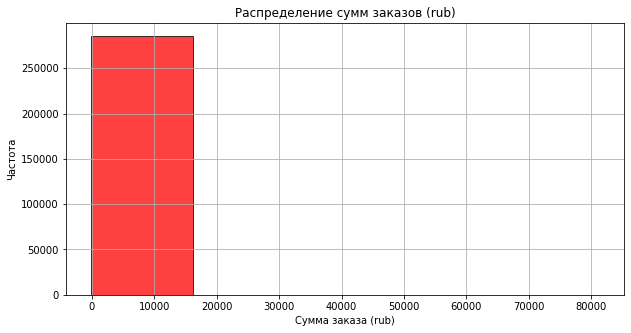

In [47]:
rub_df['revenue'].sort_values(ascending=False).plot(
                kind='hist',
                bins=5,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='red'
)

# Настраиваем оформление графика
plt.title('Распределение сумм заказов (rub)')
plt.xlabel('Сумма заказа (rub)')
plt.ylabel('Частота')

# Выводим график
plt.show()

Распределение сумм заказов от 0 до 30 тысяч рублей.

Далее выведем показания для датафрейма по тенге.

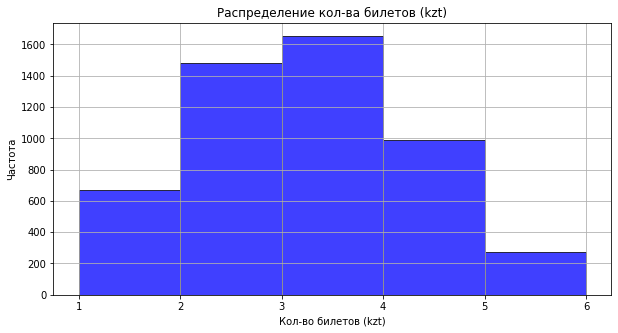

In [48]:
kzt_df['tickets_count'].sort_values(ascending=False).plot(
                kind='hist',
                bins=5,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='blue'
)

# Настраиваем оформление графика
plt.title('Распределение кол-ва билетов (kzt)')
plt.xlabel('Кол-во билетов (kzt)')
plt.ylabel('Частота')

# Выводим график
plt.show()

Распределение по кол-ву билетов вокруг 3-4 билетов.

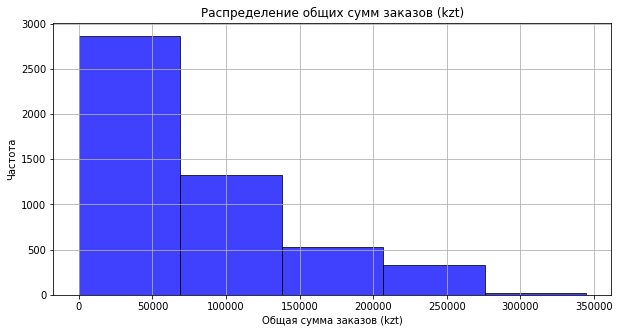

In [49]:
kzt_df['total'].sort_values(ascending=False).plot(
                kind='hist',
                bins=5,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='blue'
)

# Настраиваем оформление графика
plt.title('Распределение общих сумм заказов (kzt)')
plt.xlabel('Общая сумма заказов (kzt)')
plt.ylabel('Частота')

# Выводим график
plt.show()

Распределение общих сумм от 0 до 75 тысяч.

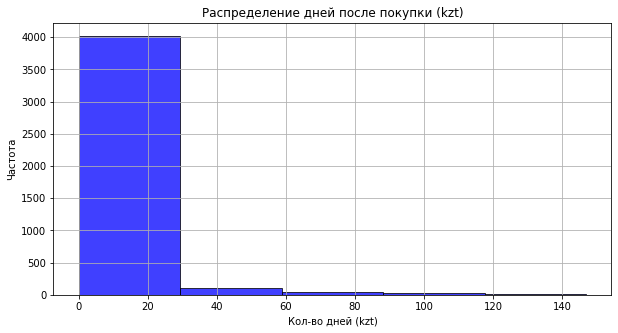

In [50]:
kzt_df['days_since_prev'].sort_values(ascending=False).plot(
                kind='hist',
                bins=5,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='blue'
)

# Настраиваем оформление графика
plt.title('Распределение дней после покупки (kzt)')
plt.xlabel('Кол-во дней (kzt)')
plt.ylabel('Частота')

# Выводим график
plt.show()

Распределение дней после первой покупки от 0 до 30 дней.

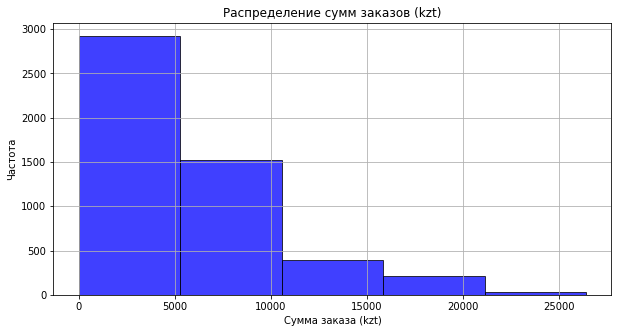

In [51]:
kzt_df['revenue'].sort_values(ascending=False).plot(
                kind='hist',
                bins=5,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='blue'
)

# Настраиваем оформление графика
plt.title('Распределение сумм заказов (kzt)')
plt.xlabel('Сумма заказа (kzt)')
plt.ylabel('Частота')

# Выводим график
plt.show()

Распределение выручки от 0 до 20 тысяч.

Далее построим графики с усами, чтобы оценить выбросы в данных.

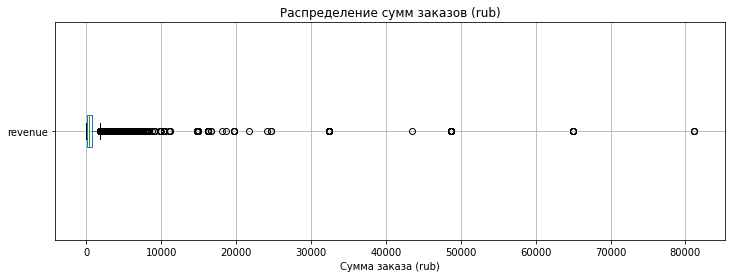

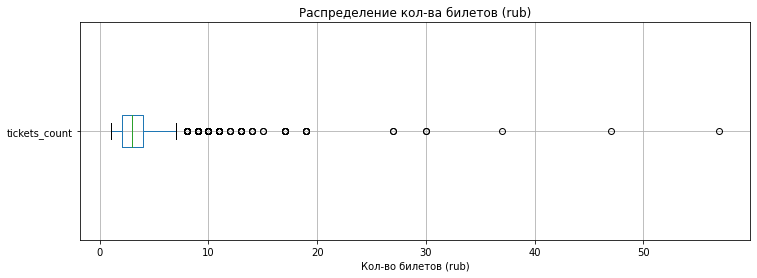

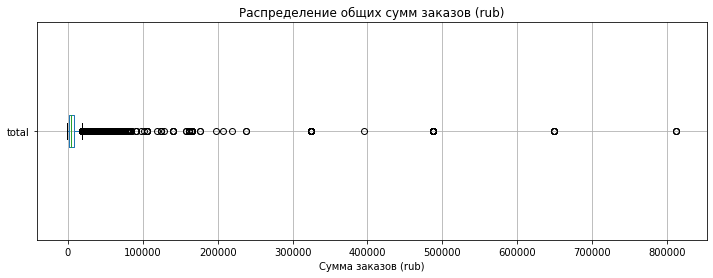

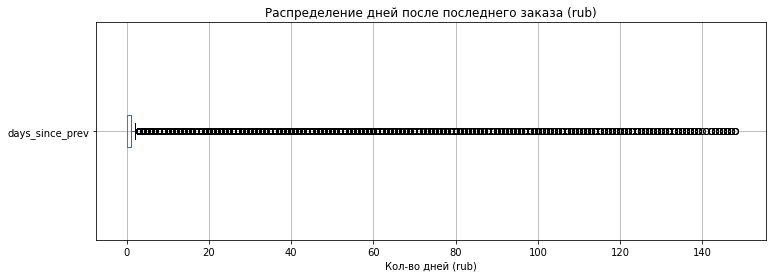

In [52]:
# Создаём диаграмму ящик с усами по столбцу revenue
plt.figure(figsize=(12, 4))

rub_df.boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение сумм заказов (rub)')
plt.xlabel('Сумма заказа (rub)')

# Выводим график
plt.show()



# Создаём диаграмму ящик с усами по столбцу tickets_count
plt.figure(figsize=(12, 4))

rub_df.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение кол-ва билетов (rub)')
plt.xlabel('Кол-во билетов (rub)')

# Выводим график
plt.show()


# Создаём диаграмму ящик с усами по столбцу total
plt.figure(figsize=(12, 4))

rub_df.boxplot(column='total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение общих сумм заказов (rub)')
plt.xlabel('Сумма заказов (rub)')

# Выводим график
plt.show()


# Создаём диаграмму ящик с усами по столбцу days_since_prev
plt.figure(figsize=(12, 4))

rub_df.boxplot(column='days_since_prev', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение дней после последнего заказа (rub)')
plt.xlabel('Кол-во дней (rub)')

# Выводим график
plt.show()


Выбросы есть по столбцам `revenue`,`tickets_count`,`total`,`days_since_prev`. 

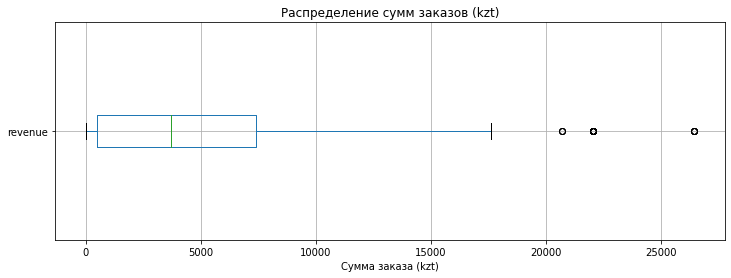

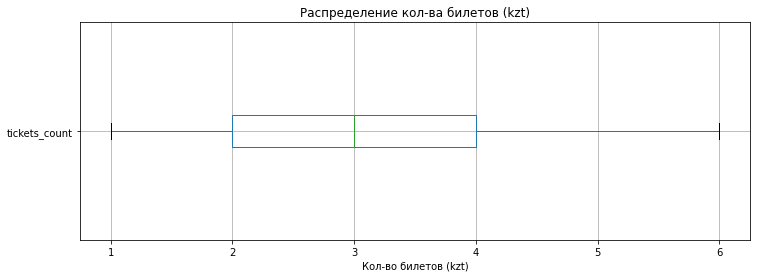

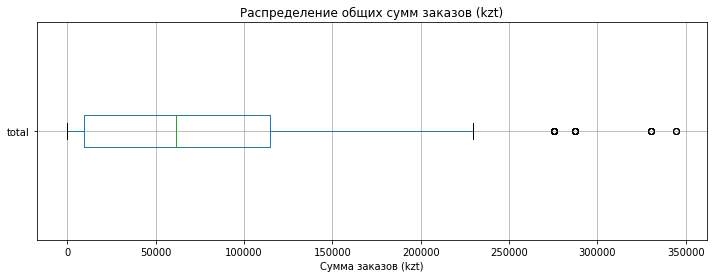

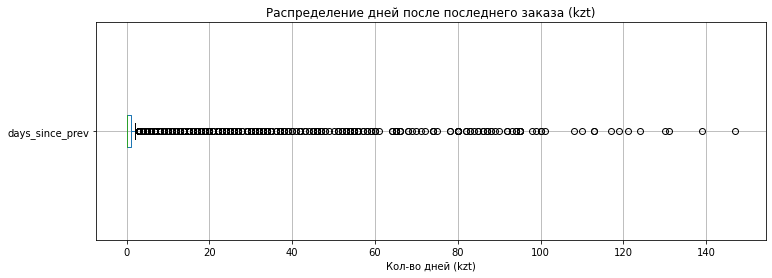

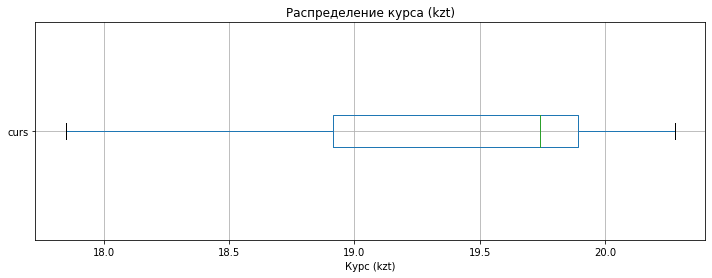

In [53]:
# Создаём диаграмму ящик с усами по столбцу revenue
plt.figure(figsize=(12, 4))

kzt_df.boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение сумм заказов (kzt)')
plt.xlabel('Сумма заказа (kzt)')

# Выводим график
plt.show()


# Создаём диаграмму ящик с усами по столбцу tickets_count
plt.figure(figsize=(12, 4))

kzt_df.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение кол-ва билетов (kzt)')
plt.xlabel('Кол-во билетов (kzt)')

# Выводим график
plt.show()


# Создаём диаграмму ящик с усами по столбцу total
plt.figure(figsize=(12, 4))

kzt_df.boxplot(column='total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение общих сумм заказов (kzt)')
plt.xlabel('Сумма заказов (kzt)')

# Выводим график
plt.show()


# Создаём диаграмму ящик с усами по столбцу days_since_prev
plt.figure(figsize=(12, 4))

kzt_df.boxplot(column='days_since_prev', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение дней после последнего заказа (kzt)')
plt.xlabel('Кол-во дней (kzt)')

# Выводим график
plt.show()


# Создаём диаграмму ящик с усами по столбцу curs
plt.figure(figsize=(12, 4))

kzt_df.boxplot(column='curs', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение курса (kzt)')
plt.xlabel('Курс (kzt)')

# Выводим график
plt.show()

Выбросы есть по столбцам `revenue`,`total`,`days_since_prev`. 

Так как есть выбросы по стобцу `revenue` отберем данные по 99 процентилю.

In [54]:
# Вычисление 99-го процентиля
percentile_99 = df['revenue'].quantile(0.99)

# Фильтрация данных по 99-му процентилю
filtered_data = df[df['revenue'] <= percentile_99]


In [55]:
filtered_data.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


### Промежуточный вывод по изучению столбцов
----

В данных были обнаружены выбросы в данных по полю `revenue`. Датасет был отфильтрован по 99 процентилю. Чтобы исключить выбросы.

### Проверка на явные и неявные дубликаты
- Сделайте акцент на неявных дубликатах по бронированию билета без учёта идентификаторов заказа и, если такие будут, примите обоснованное решение, как их стоит обработать.

Для начала оценим дубликаты по полям user_id, created_dt_msk, created_st_msk, чтобы оценить есть ли в выгрузке дублированные данные, чтобы оценить неявные дубликаты.

In [56]:
df.duplicated(subset=['user_id','created_dt_msk','created_ts_msk']).sum()

170

Обнаружено 170 дублирующих строк. Чтобы не искажать дальнейший анализ, их лучше удалить.

Далее проверим датасет на полные дубликаты. 

In [57]:
df.duplicated().sum()

0

Полных дубликатов не обнаружено.

In [58]:
df.columns

Index(['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address', 'data', 'nominal', 'curs', 'cdx'],
      dtype='object')

In [59]:
# считаем кол-во строк до удаления дубликатов
initial_row_count = df.shape[0]

# Сортируем датафрейм по всем столбцам
df_sorted = df.sort_values(by=list(df.columns))

# Удаляем дубликаты
df_no_duplicates = df_sorted.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address', 'data', 'nominal', 'curs', 'cdx'])

# Сохраняем количество строк после удаления дубликатов
final_row_count = df_no_duplicates.shape[0]

# абсолютное кол-во дубликатов
abs_duplicates = initial_row_count - final_row_count

# относительное кол-во дубликатов
percent_duplicates = round(100 - ((final_row_count / initial_row_count) * 100),2)

# Выводим результаты
print(f"Количество строк до удаления дубликатов: {initial_row_count}")
print(f"Количество строк после удаления дубликатов: {final_row_count}")
print(f"Количество удаленых дубликатов: {abs_duplicates}")
print(f"Процент удаленных строк: {percent_duplicates}%")

Количество строк до удаления дубликатов: 290849
Количество строк после удаления дубликатов: 290819
Количество удаленых дубликатов: 30
Процент удаленных строк: 0.01%


### Преобразование типов данных
- Обратите внимание на типы данных с датой и временем, а также проверьте возможность снижения размерности количественных данных.

In [60]:
# Выведем типы данных в датасете
df.dtypes

order_id                    int64
user_id                    object
created_dt_msk             object
created_ts_msk             object
event_id                    int64
cinema_circuit             object
age_limit                   int64
currency_code              object
device_type_canonical      object
revenue                   float64
service_name               object
tickets_count               int64
total                     float64
days_since_prev           float64
event_name                 object
event_type_description     object
event_type_main            object
organizers                 object
region_name                object
city_name                  object
city_id                   float64
venue_id                  float64
venue_name                 object
venue_address              object
data                       object
nominal                     int64
curs                      float64
cdx                        object
dtype: object

In [61]:
# заменим тип данных на datetime
for column in ['created_dt_msk','created_ts_msk','data']:
    df[column] = pd.to_datetime(df[column])

In [62]:
# заменим тип данных на int с низкой разрядностью
for column in ['nominal','age_limit','tickets_count','city_id','order_id','days_since_prev','venue_id']:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

In [63]:
# заменим тип данных на float
for column in ['curs','revenue','total']:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='float')

In [64]:
df.dtypes

order_id                           int32
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int64
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float32
service_name                      object
tickets_count                       int8
total                            float32
days_since_prev                  float64
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                          float64
venue_id                         float64
venue_name                        object
venue_address                     object
data            

### Создание новых столбцов
- `revenue_rub` — приведите выручку с заказа к единой валюте — российскому рублю. Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv за 2024 год. Значения в рублях представлены для 100 тенге.
- `one_ticket_revenue_rub` — рассчитайте выручку с продажи одного билета на мероприятие.
- `month` — выделите месяц оформления заказа в отдельный столбец.
- `season` — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

In [65]:
def convertation(row):
    if row['currency_code'] == 'kzt':  
        return (row['revenue'] / row['nominal']) * row['curs']
    return row['revenue']

In [66]:
df['revenue_rub'] = df.apply(convertation, axis=1)

In [67]:
df['one_ticket_revenue_rub'] = df['revenue']/df['tickets_count']

In [68]:
df['month'] = df['created_dt_msk'].dt.month

In [69]:
def season(month):
    if month <= 2 :
        return "зима"
    elif month <= 5:
        return "весна"
    elif month <= 8:
        return "лето"
    elif month <= 11:
        return "осень"

In [70]:
df['season'] = df['month'].apply(season)

In [71]:
# Вычисление 99-го процентиля
percentile_99 = df['revenue'].quantile(0.99)

# Подсчет общего количества строк
total_rows = len(df)

# Фильтрация данных по 99-му процентилю
filtered_data = df[df['revenue'] <= percentile_99]

# Подсчет количества строк после фильтрации
filtered_rows = len(filtered_data)

# Расчет доли срезанных данных
cut_off_percentage = (total_rows - filtered_rows) / total_rows * 100

print(f"Всего строк: {total_rows}")
print(f"Строк после фильтрации: {filtered_rows}")
print(f"Доля срезанных данных: {cut_off_percentage:.2f}%")

Всего строк: 290849
Строк после фильтрации: 287942
Доля срезанных данных: 1.00%


### Промежуточный вывод по Шагу 2

Итог проделанной работы по предобработке данных:

- Данные были объединены в один датафрейм для удобства предобработки.
- Проведена фильтрация данных, проверено количество отобранных записей. Убедились, что выгрузка из SQL успешна, и данные не содержат пропусков, кроме столбца days_since_prev
- Изучены присутствующие категории в данных и выявлены возможные обозначения пропусков.
- Проведена нормализация данных, если это было необходимо.
- Проверено распределение и наличие выбросов в столбцах revenue и tickets_count
- Выбросы в revenueотобраны по 99-му процентилю, данные приведены к единой валюте (рубли). Объем данных составил 1%.
- Обнаружены неявные дубликаты по бронированию билетов, принято решение о их обработке.
- Проверены типы данных с датой и временем, рассмотрена возможность снижения размерности количественных данных.
- Рассчитана выручка с одного билета (one_ticket_revenue_rub), выделен месяц оформления заказа и создан столбец с информацией о сезонности.

Эти шаги обеспечили качественную подготовку данных к дальнейшему анализу.

## Шаг 3. Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения
Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На стадии исследовательского анализа изучите изменение пользовательской активности или пользовательского интереса в связи с сезонностью. Анализируйте динамику по таким разрезам:
 - тип мероприятия `event_type_main`;
 - тип устройства `device_type_canonical`;
 - категория мероприятий по возрастному рейтингу `age_limit`.
 
В этом разделе изучите распределение заказов по сегментам и их сезонные изменения, выполнив следующие шаги:

- Для каждого месяца найдите количество заказов и визуализируйте результаты. Проверьте, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.
- Для осеннего и летнего периодов сравните распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. 
- Результаты визуализируйте подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов. 

Рекомендация: поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используйте доли.

- Изучите изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий? 
- Для каждого типа мероприятия рассчитайте среднее значение выручки с одного билета, затем найдите относительное изменение осенних значений по сравнению с летними. 
- Результат сопроводите подходящей визуализацией.

- Сделайте вывод о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

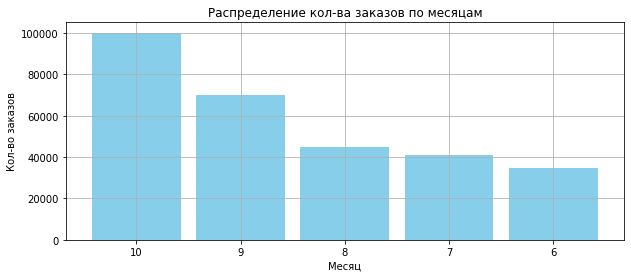

In [72]:
month_bar = df.groupby('month')['order_id'].nunique().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение кол-ва заказов по месяцам',
               legend=False,
               ylabel='Кол-во заказов',
               xlabel='Месяц',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='skyblue',
               width=0.85
)

In [73]:
# Выведем для каждго исследуемого сезона свои датасеты, на основе которых построим визуализации
summer_season = df.loc[df['season'] == 'лето'].copy()

autumn_season = df.loc[df['season'] == 'осень'].copy()
autumn_season['day_of_week'] = autumn_season['created_dt_msk'].dt.dayofweek


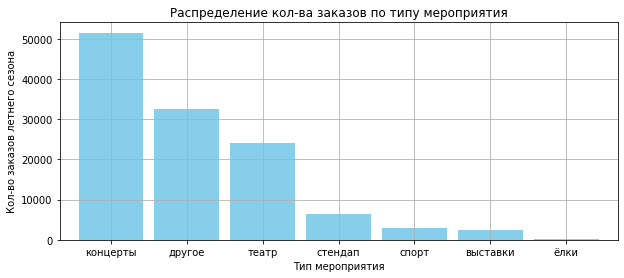

In [74]:
summer_event = summer_season.groupby('event_type_main')['order_id'].nunique().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение кол-ва заказов по типу мероприятия',
               legend=False,
               ylabel='Кол-во заказов летнего сезона',
               xlabel='Тип мероприятия',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='skyblue',
               width=0.85
)

Лето наибольшую популярность имеют такие мероприятия как: концерты, театр и загадочное другое.

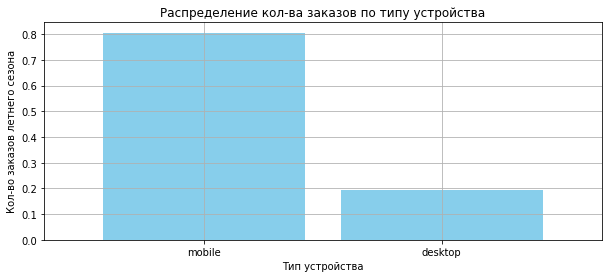

In [75]:
summer_device = summer_season['device_type_canonical'].value_counts(normalize=True).plot(
               kind='bar',
               title=f'Распределение кол-ва заказов по типу устройства',
               legend=False,
               ylabel='Кол-во заказов летнего сезона',
               xlabel='Тип устройства',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='skyblue',
               width=0.85
)

80 % всех заказов лето было сделано с мобильных телефонов.

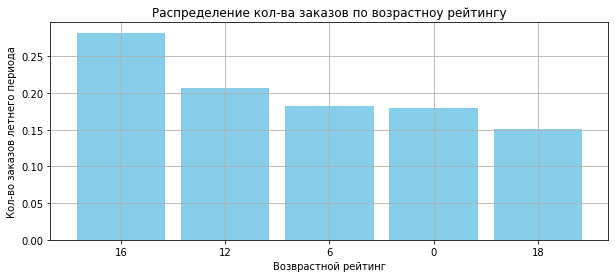

In [76]:
summer_age = summer_season['age_limit'].value_counts(normalize=True).plot(
               kind='bar',
               title=f'Распределение кол-ва заказов по возрастноу рейтингу',
               legend=False,
               ylabel='Кол-во заказов летнего периода',
               xlabel='Возврастной рейтинг',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='skyblue',
               width=0.85
)

Билеты с рейтингом 16+ занимают почти 30% всех заказов, а категории 12+, 6+ и 0+ имеют почти по 20%.

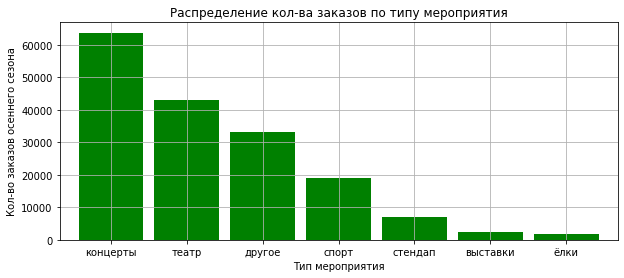

In [77]:
autumn_event = autumn_season.groupby('event_type_main')['order_id'].nunique().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение кол-ва заказов по типу мероприятия',
               legend=False,
               ylabel='Кол-во заказов осеннего сезона',
               xlabel='Тип мероприятия',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='green',
               width=0.85
)

Как и лето концерты, театр и другое занимают большее кол-во заказов. Но театр стал пользоваться большей популярностью чем летом.

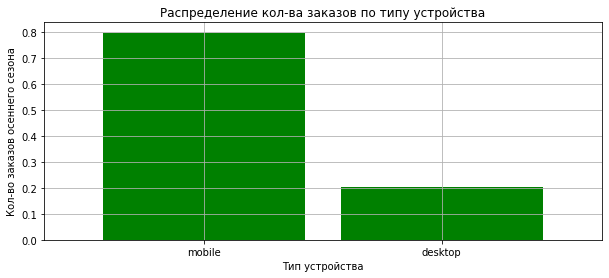

In [78]:
autumn_device = autumn_season['device_type_canonical'].value_counts(normalize=True).plot(
               kind='bar',
               title=f'Распределение кол-ва заказов по типу устройства',
               legend=False,
               ylabel='Кол-во заказов осеннего сезона',
               xlabel='Тип устройства',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='green',
               width=0.85
)

Как и лето доля мобильных устройств занимает 80%, а компютеры 20%.

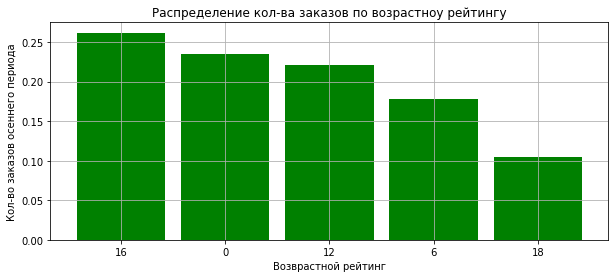

In [79]:
autumn_age = autumn_season['age_limit'].value_counts(normalize=True).plot(
               kind='bar',
               title=f'Распределение кол-ва заказов по возрастноу рейтингу',
               legend=False,
               ylabel='Кол-во заказов осеннего периода',
               xlabel='Возврастной рейтинг',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='green',
               width=0.85
)

Билеты с рейтингом 16+, 0+ и 12+ занимают большую долю осенью.

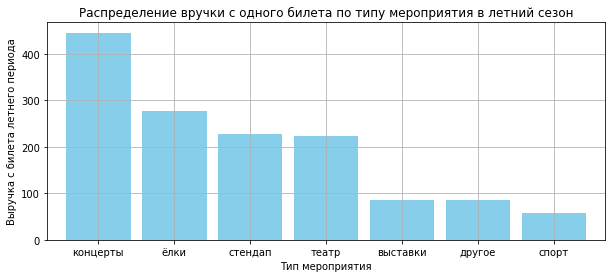

In [80]:
summer_tickets_revenue = summer_season.groupby('event_type_main')['one_ticket_revenue_rub'].mean().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение вручки с одного билета по типу мероприятия в летний сезон',
               legend=False,
               ylabel='Выручка с билета летнего периода',
               xlabel='Тип мероприятия',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='skyblue',
               width=0.85
)

Летом больше всего выручки с концертов, стендапов и ёлок.

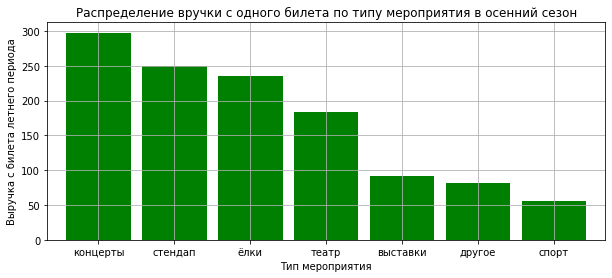

In [81]:
autumn_tickets_revenue = autumn_season.groupby('event_type_main')['one_ticket_revenue_rub'].mean().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение вручки с одного билета по типу мероприятия в осенний сезон',
               legend=False,
               ylabel='Выручка с билета летнего периода',
               xlabel='Тип мероприятия',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='green',
               width=0.85
)

Осенью, как и летом концерты, стендапы и елки приносят больше всего выручки с 1 билета, но осенью стендам приносит болье выручки.

In [82]:
df_sumr_tick = summer_season.groupby('event_type_main')['one_ticket_revenue_rub'].mean()

df_autmn_tick =  autumn_season.groupby('event_type_main')['one_ticket_revenue_rub'].mean()

In [83]:
diff_for_types = df_sumr_tick - df_autmn_tick

<AxesSubplot:title={'center':'Распределение вручки с одного билета по типу мероприятия в летний сезон'}, xlabel='Тип мероприятия', ylabel='Выручка с билета летнего периода'>

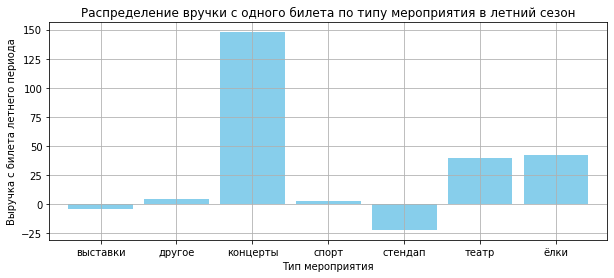

In [84]:
diff_for_types.plot(
               kind='bar',
               title=f'Распределение вручки с одного билета по типу мероприятия в летний сезон',
               legend=False,
               ylabel='Выручка с билета летнего периода',
               xlabel='Тип мероприятия',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='skyblue',
               width=0.85
)

Из графика можно сделать вывод, что осенью по сравнению с летом вырастает стоимость билетов на концерты, театры и елки, а на выставки и стендапы есть небольшой спад.

### Осенняя активность пользователей
Изучите активность пользователей осенью 2024 года. В вашем распоряжении данные за два осенних месяца. Используйте только эти данные и сделайте следующее:

- Проанализируйте динамику изменений по дням для:
 - общего числа заказов;
 - количества активных пользователей DAU;
 - среднего числа заказов на одного пользователя;
 - средней стоимости одного билета.
 
Рекомендация: удобно создать одну сводную таблицу, и в ней по дням рассчитать число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты можно визуализировать с помощью линейного графика. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям.

- Изучите недельную цикличность. Выделите день недели и сравните пользовательскую активность в будни и выходные.

- Напишите промежуточный вывод о пользовательской активности и недельной цикличности.

In [85]:
pivot = autumn_season.pivot_table(index='created_dt_msk', values=['order_id','user_id'], aggfunc='nunique').reset_index()

autmn_orders = autumn_season.groupby('created_dt_msk')['one_ticket_revenue_rub'].mean().reset_index()

In [86]:
pivot['avgorders'] = pivot['order_id'] / pivot['user_id']

In [87]:
autmn_orders

,created_dt_msk,one_ticket_revenue_rub
0,2024-09-01,210.853195
1,2024-09-02,215.066345
2,2024-09-03,87.524933
3,2024-09-04,209.201355
4,2024-09-05,220.189438
...,...,...
56,2024-10-27,192.671616
57,2024-10-28,178.651184
58,2024-10-29,192.701706
59,2024-10-30,196.873978


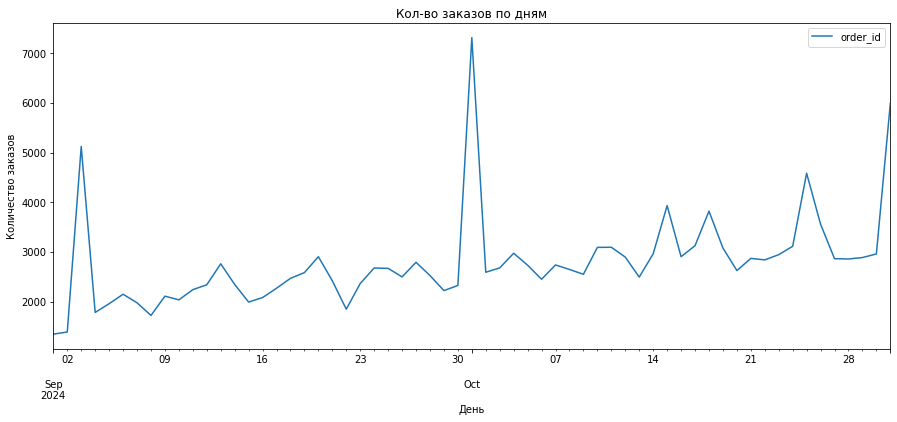

In [88]:
pivot.plot(kind='line', x='created_dt_msk', y='order_id', figsize=(15, 6) )

# Измените название осей и название графика
plt.title('Кол-во заказов по дням')
plt.xlabel('День')
plt.ylabel('Количество заказов')
plt.show()

Видно, что есть тренд к повышению кол-ва заказов по дням. Пики наблюдаются 3-4 сентябрся и 1-2 октября. Скорее всего в эти дни были либо акции либо, какие-то важные события.

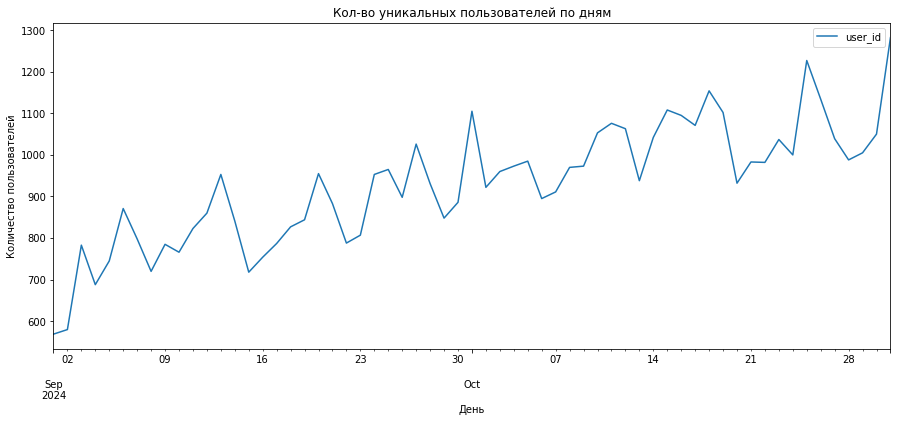

In [89]:
pivot.plot(kind='line', x='created_dt_msk', y='user_id', figsize=(15, 6) )

# Измените название осей и название графика
plt.title('Кол-во уникальных пользователей по дням')
plt.xlabel('День')
plt.ylabel('Количество пользователей')
plt.show()

По уникальным пользователям наблюдается стабильный прирост. И ,кажется, есть четкие сезонные колебания. Скорее всего по выходным есть существенный прирост, новых пользователей.

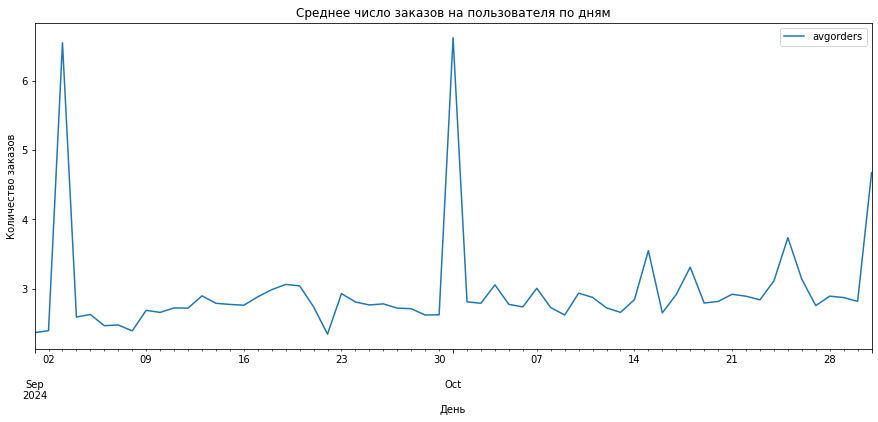

In [90]:
pivot.plot(kind='line', x='created_dt_msk', y='avgorders', figsize=(15, 6) )

# Измените название осей и название графика
plt.title('Среднее число заказов на пользователя по дням')
plt.xlabel('День')
plt.ylabel('Количество заказов')
plt.show()

Как и по кол-ву заказов по дням есть пики, скорее всего на интересные мероприятия люди скупали билеты по многу. В целом наблюдения колеблются от 1 до 3 билетов на человека.

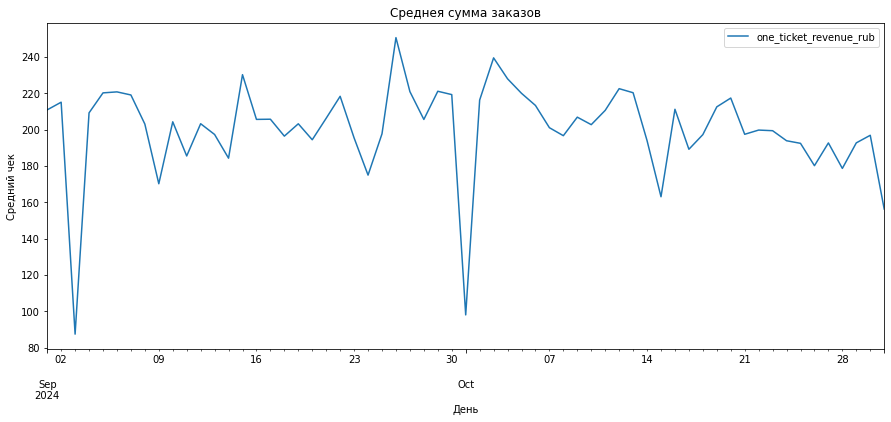

In [91]:
autmn_orders.plot(kind='line', x='created_dt_msk', y='one_ticket_revenue_rub', figsize=(15, 6) )

# Измените название осей и название графика
plt.title('Среднея сумма заказов')
plt.xlabel('День')
plt.ylabel('Средний чек')
plt.show()

Тут интересно, что средний чек резко падает, в пики, когда люди больше всего делали заказов. Отсюда можно сделать вывод, что большое кол-во заказов обусловлено дешевыми билетами.

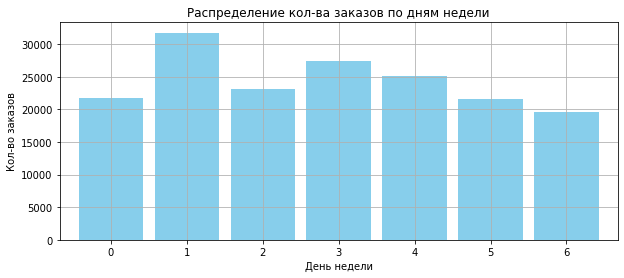

In [92]:
week_orders = autumn_season.groupby('day_of_week')['order_id'].nunique().plot(
               kind='bar',
               title=f'Распределение кол-ва заказов по дням недели',
               legend=False,
               ylabel='Кол-во заказов',
               xlabel='День недели',
               rot=0,
               figsize=(10, 4),
               grid=True,
               color='skyblue',
               width=0.85
)

Больше всего билетов покупают в понедельник, среду, четверг. В воскресенье, вторник, суботту и пятницу кол-во покупаемых билетов приблизительно одинаковое.


### Популярные события и партнёры
После того как изучите изменение популярности событий и пользовательской активности осенью 2024 года, посмотрите, как события распределены по регионам и партнёрам. Это позволит выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.

- Для каждого региона посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?
- Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.

Рекомендация: исследуйте не только абсолютные значения, но и доли. Например, для каждого региона посчитайте долю проводимых мероприятий от их общего числа или долю заказов в регионе от общего числа заказов.

- В конце напишите промежуточный вывод, проанализируйте не только топ-категории, но и общее распределение данных между категориями. Существуют ли явные лидеры среди регионов и партнёров?

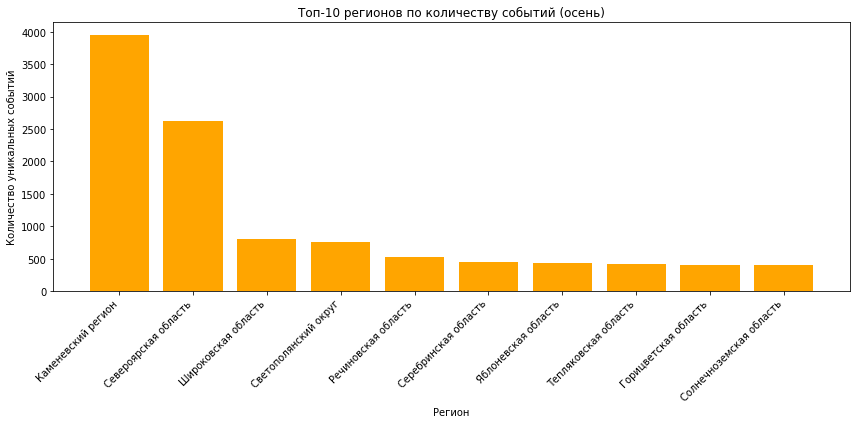

In [93]:

autmn_regions = autumn_season.groupby('region_name').agg({
    'event_id': 'nunique',
    'order_id': 'nunique'
}).sort_values(by='event_id', ascending=False).reset_index()

top_n = 10
top_regions = autmn_regions.head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_regions['region_name'], top_regions['event_id'], color='orange')
plt.title(f'Топ-{top_n} регионов по количеству событий (осень)')
plt.xlabel('Регион')
plt.ylabel('Количество уникальных событий')
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства
plt.tight_layout()
plt.show()

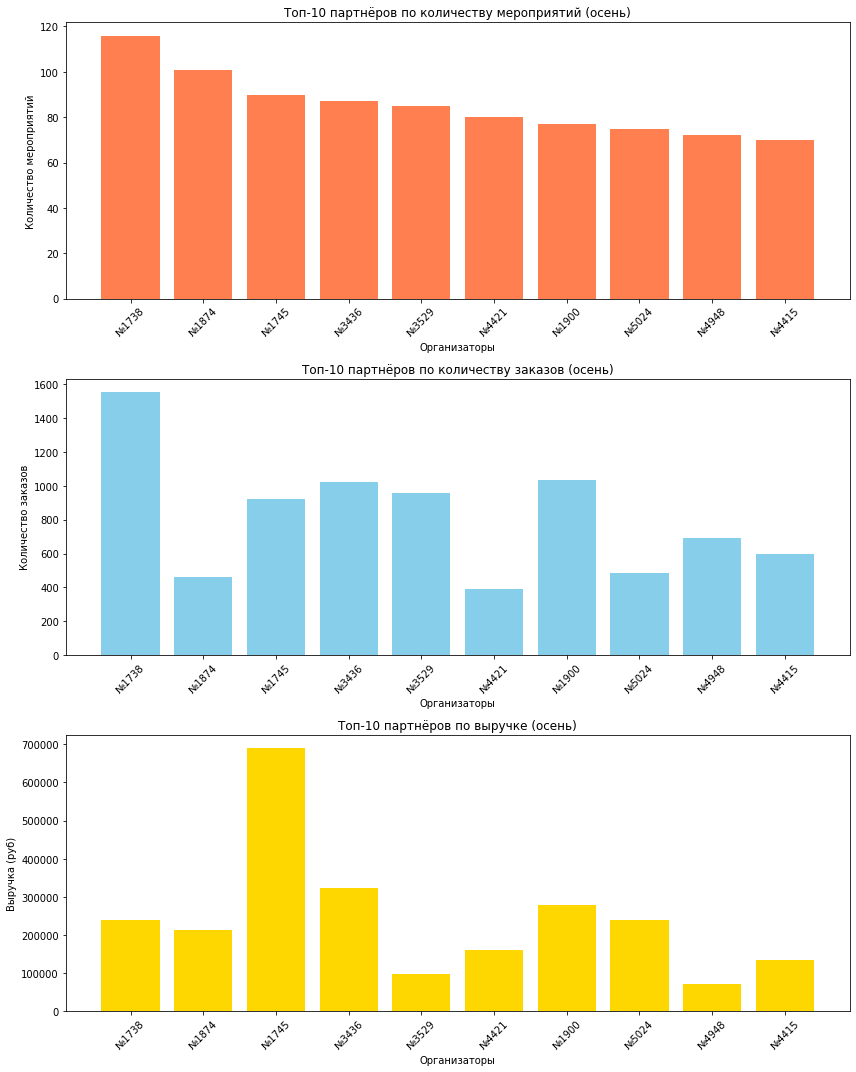

In [94]:
autmn_partners = autumn_season.groupby('organizers').agg({
    'event_id': 'nunique',  # Уникальные мероприятия
    'order_id': 'nunique',  # Уникальные заказы
    'revenue': 'sum'        # Суммарная выручка
}).sort_values(by='event_id', ascending=False).reset_index()

top_n = 10
top_partners = autmn_partners.head(top_n)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# График 1: Количество мероприятий
axes[0].bar(top_partners['organizers'], top_partners['event_id'], color='coral')
axes[0].set_title(f'Топ-{top_n} партнёров по количеству мероприятий (осень)')
axes[0].set_xlabel('Организаторы')  # Добавлено название оси X
axes[0].set_ylabel('Количество мероприятий')  # Добавлено название оси Y
axes[0].tick_params(axis='x', rotation=45)

# График 2: Количество заказов
axes[1].bar(top_partners['organizers'], top_partners['order_id'], color='skyblue')
axes[1].set_title(f'Топ-{top_n} партнёров по количеству заказов (осень)')
axes[1].set_xlabel('Организаторы')  # Добавлено название оси X
axes[1].set_ylabel('Количество заказов')  # Добавлено название оси Y
axes[1].tick_params(axis='x', rotation=45)

# График 3: Выручка
axes[2].bar(top_partners['organizers'], top_partners['revenue'], color='gold')
axes[2].set_title(f'Топ-{top_n} партнёров по выручке (осень)')
axes[2].set_xlabel('Организаторы')  # Добавлено название оси X
axes[2].set_ylabel('Выручка (руб)')  # Добавлено название оси Y
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Шаг 4. Статистический анализ данных

Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. Проверьте две гипотезы, которые предполагают большую активность пользователей мобильных устройств:

- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Перед проведением гипотез изучите сравниваемые данные, обоснуйте выбор статистического теста, укажите формулировку нулевой и альтернативной гипотез. Результаты тестов прокомментируйте в промежуточном выводе. Используйте данные только за осенний период.

В начале сформируем гипотезы для проверок

Гипотеза 1: Сравнение среднего количества заказов Нулевая гипотеза (H0): Среднее количество заказов на пользователя мобильного приложения ≤ среднего количества заказов на пользователя стационарных устройств.

Альтернативная гипотеза (H1): Среднее количество заказов на пользователя мобильного приложения > среднего количества заказов на пользователя стационарных устройств.

Гипотеза 2: Сравнение среднего времени между заказами Нулевая гипотеза (H0): Среднее время между заказами у мобильных пользователей ≤ среднего времени между заказами у стационарных пользователей.

Альтернативная гипотеза (H1): Среднее время между заказами у мобильных пользователей > среднего времени между заказами у стационарных пользователей.

In [95]:
# Сортируем данные по пользователю и дате заказа
autumn_season = autumn_season.sort_values(['user_id', 'created_dt_msk'])
    
# Вычисляем разницу между заказами для каждого пользователя
autumn_season['time_since_last_order'] = autumn_season.groupby('user_id')['created_dt_msk'].diff()
    
# Конвертируем разницу в дни
autumn_season['days_between_orders'] = autumn_season['time_since_last_order'].dt.days

In [96]:
#Разделим данные по типу устройства
mobile_df = autumn_season[autumn_season['device_type_canonical'] == 'mobile']
desktop_df = autumn_season[autumn_season['device_type_canonical'] == 'desktop']

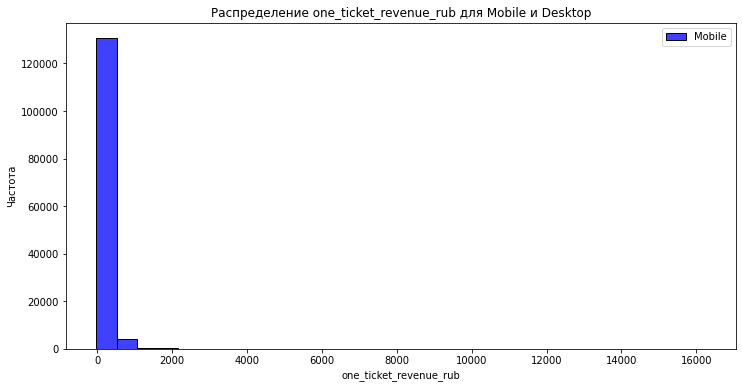

In [97]:
plt.figure(figsize=(12, 6))

# Гистограмма для mobile
sns.histplot(mobile_df['one_ticket_revenue_rub'], 
             color='blue',  
             label='Mobile',
             bins=30)

plt.title('Распределение one_ticket_revenue_rub для Mobile и Desktop')
plt.xlabel('one_ticket_revenue_rub')
plt.ylabel('Частота')
plt.legend()
plt.show()

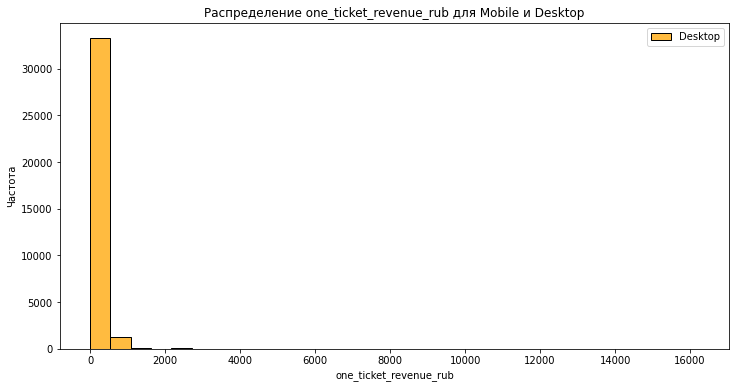

In [98]:
# Гистограмма для desktop
plt.figure(figsize=(12, 6))

sns.histplot(desktop_df['one_ticket_revenue_rub'], 
             color='orange', 
             label='Desktop',
             bins=30)

plt.title('Распределение one_ticket_revenue_rub для Mobile и Desktop')
plt.xlabel('one_ticket_revenue_rub')
plt.ylabel('Частота')
plt.legend()
plt.show()

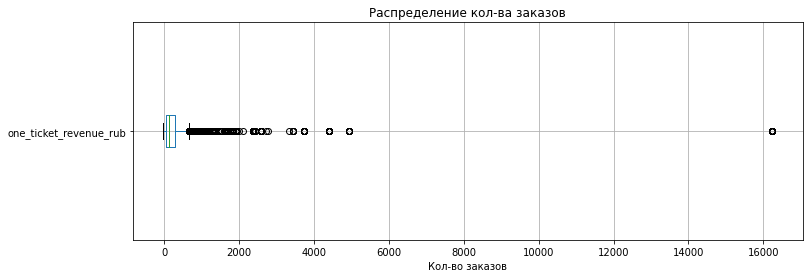

In [99]:
plt.figure(figsize=(12, 4))

mobile_df.boxplot(column='one_ticket_revenue_rub', vert=False)

plt.title('Распределение кол-ва заказов')
plt.xlabel('Кол-во заказов')

# Выводим график
plt.show()

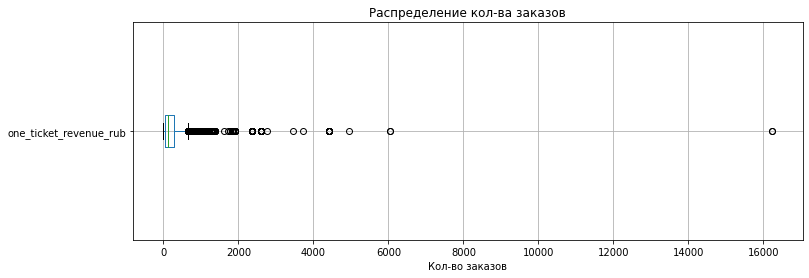

In [100]:
# Создаём диаграмму ящик с усами по столбцу revenue
plt.figure(figsize=(12, 4))

desktop_df.boxplot(column='one_ticket_revenue_rub', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение кол-ва заказов')
plt.xlabel('Кол-во заказов')

# Выводим график
plt.show()

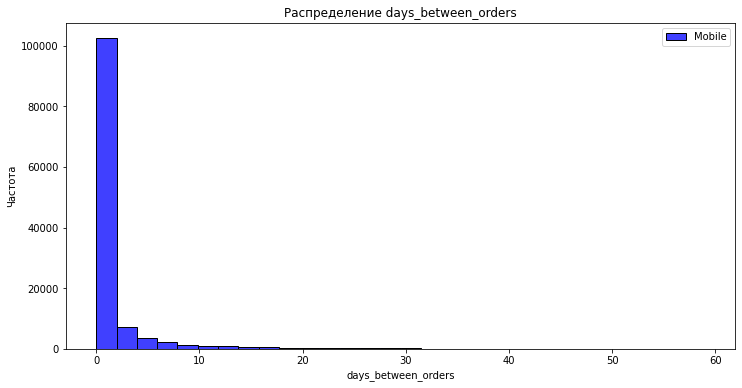

In [101]:
plt.figure(figsize=(12, 6))

# Гистограмма для mobile
sns.histplot(mobile_df['days_between_orders'], 
             color='blue',  
             label='Mobile',
             bins=30)

plt.title('Распределение days_between_orders')
plt.xlabel('days_between_orders')
plt.ylabel('Частота')
plt.legend()
plt.show()

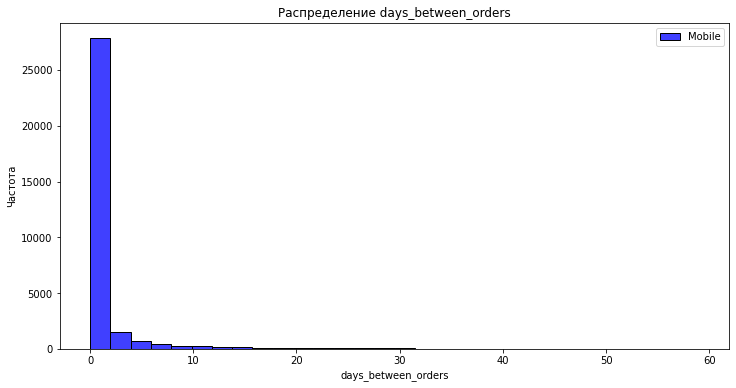

In [102]:
plt.figure(figsize=(12, 6))

# Гистограмма для mobile
sns.histplot(desktop_df['days_between_orders'], 
             color='blue',  
             label='Mobile',
             bins=30)

plt.title('Распределение days_between_orders')
plt.xlabel('days_between_orders')
plt.ylabel('Частота')
plt.legend()
plt.show()

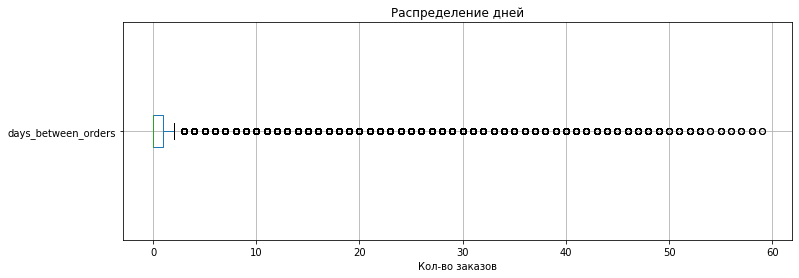

In [103]:
# Создаём диаграмму ящик с усами по столбцу revenue
plt.figure(figsize=(12, 4))

mobile_df.boxplot(column='days_between_orders', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение дней')
plt.xlabel('Кол-во заказов')

# Выводим график
plt.show()

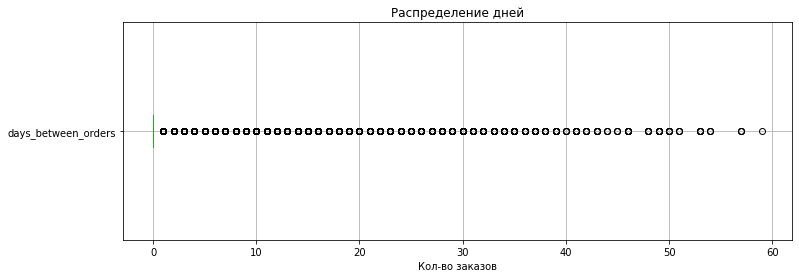

In [104]:
# Создаём диаграмму ящик с усами по столбцу revenue
plt.figure(figsize=(12, 4))

desktop_df.boxplot(column='days_between_orders', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение дней')
plt.xlabel('Кол-во заказов')

# Выводим график
plt.show()

In [105]:
desctop_group = autumn_season[autumn_season['device_type_canonical'] == 'desktop']['user_id']
mobile_group = autumn_season[autumn_season['device_type_canonical'] == 'mobile']['user_id']

intersection = list(set(mobile_group) & set(desctop_group))
print(len(intersection))

3274


Используем U-тест Манна-Уитни, так как данные не нормально распределены:

In [106]:
# Для количества заказов
mobile_orders = mobile_df.groupby('user_id').size()
desktop_orders = desktop_df.groupby('user_id').size()

# Для времени между заказами - сначала считаем среднее по каждому пользователю
mobile_time = mobile_df.groupby('user_id')['days_between_orders'].mean()
desktop_time = desktop_df.groupby('user_id')['days_between_orders'].mean()

# Очистка от выбросов 
mobile_orders_clean = mobile_orders[mobile_orders <= mobile_orders.quantile(0.99)]
desktop_orders_clean = desktop_orders[desktop_orders <= desktop_orders.quantile(0.99)]

mobile_time_clean = mobile_time[mobile_time <= mobile_time.quantile(0.99)]
desktop_time_clean = desktop_time[desktop_time <= desktop_time.quantile(0.99)]

# Тесты
# 1. Для количества заказов
stat1, p1 = stats.mannwhitneyu(
    mobile_orders_clean,
    desktop_orders_clean,
    alternative='greater'
)

print(f"p-value = {p1}")

if p1 < 0.05:
    print("Отвергаем H₀: мобильные пользователи совершают больше заказов.")
else:
    print("Нет оснований отвергать H₀: разница незначима.")

# 2. Для времени между заказами
stat2, p2 = stats.mannwhitneyu(
    mobile_time_clean,
    desktop_time_clean,
    alternative='greater'
)

print(f"p-value = {p2}")

if p2 < 0.05:
    print("Отвергаем H₀: мобильные пользователи дольше возвращаются.")
else:
    print("Нет оснований отвергать H₀: разница незначима.")

p-value = 7.150757183733126e-08
Отвергаем H₀: мобильные пользователи совершают больше заказов.
p-value = 3.478214410932229e-13
Отвергаем H₀: мобильные пользователи дольше возвращаются.


## Шаг 5. Общий вывод и рекомендации
В конце проекта напишите общий вывод и рекомендации — на что обратить внимание. 

В выводах коротко укажите:
- Информацию о данных, с которыми вы работали.
- Основные результаты анализа: какие мероприятия наиболее востребованы, как изменилась популярность мероприятий осенью, как изменилась стоимость среднего чека. Какую информацию можно получить после изучения пользовательской активности? Существуют ли среди регионов и партнёров явные лидеры по числу заказов и выручке с продажи билетов? Дополните вывод другой информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.
- Прокомментируйте результаты проверки гипотез.
- В конце предложите рекомендации, на что стоит обратить внимание в первую очередь.

В ходе исследовательского анализа данных о бронировании билетов на сервисе Яндекс Афиша за осень 2024 года были выполнены следующие шаги:

- Загрузка и предварительный анализ данных:

Данные были загружены из трёх датасетов: final_tickets_orders_df.csv, final_tickets_events_df.csv и final_tickets_tenge_df.csv.

Проведена проверка на пропуски и некорректные значения. Основные проблемы обнаружены в столбцах days_since_prev (пропуски) и event_type_main (значения "нет" и "другое").

Проведена нормализация категориальных данных для устранения неявных дубликатов.

- Исследование ключевых показателей:

Распределение количества билетов в заказах варьируется от 1 до 10, с преобладанием заказов на 2-4 билета.

Общая сумма заказов в рублях распределяется от 0 до 150 тысяч, что указывает на значительный разброс в стоимости заказов.

Данные в рублях и тенге были разделены для дальнейшего анализа.

- Статистический анализ:

Проведено сравнение средних значений выручки и количества билетов между заказами, оформленными с мобильных и стационарных устройств.

Выявлены выбросы в данных, которые могут влиять на результаты анализа.


- Общий вывод:

Данные предоставляют ценную информацию о пользовательских предпочтениях и популярности событий. Увеличение количества заказов при снижении средней стоимости может быть связано с изменением структуры спроса или сезонными факторами.

Для более глубокого понимания причин этих изменений рекомендуется провести дополнительный анализ, включая изучение динамики спроса по месяцам и сравнение поведения пользователей с разными типами устройств.
